In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\mousami Datascience class\Regression Analysis\Multi Linear Regression\MLR Excel\ToyotaCorolla.csv')
#df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 0: invalid start byte

In [10]:
Corolla = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
Corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
Corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [29]:
Corolla.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [8]:
Corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


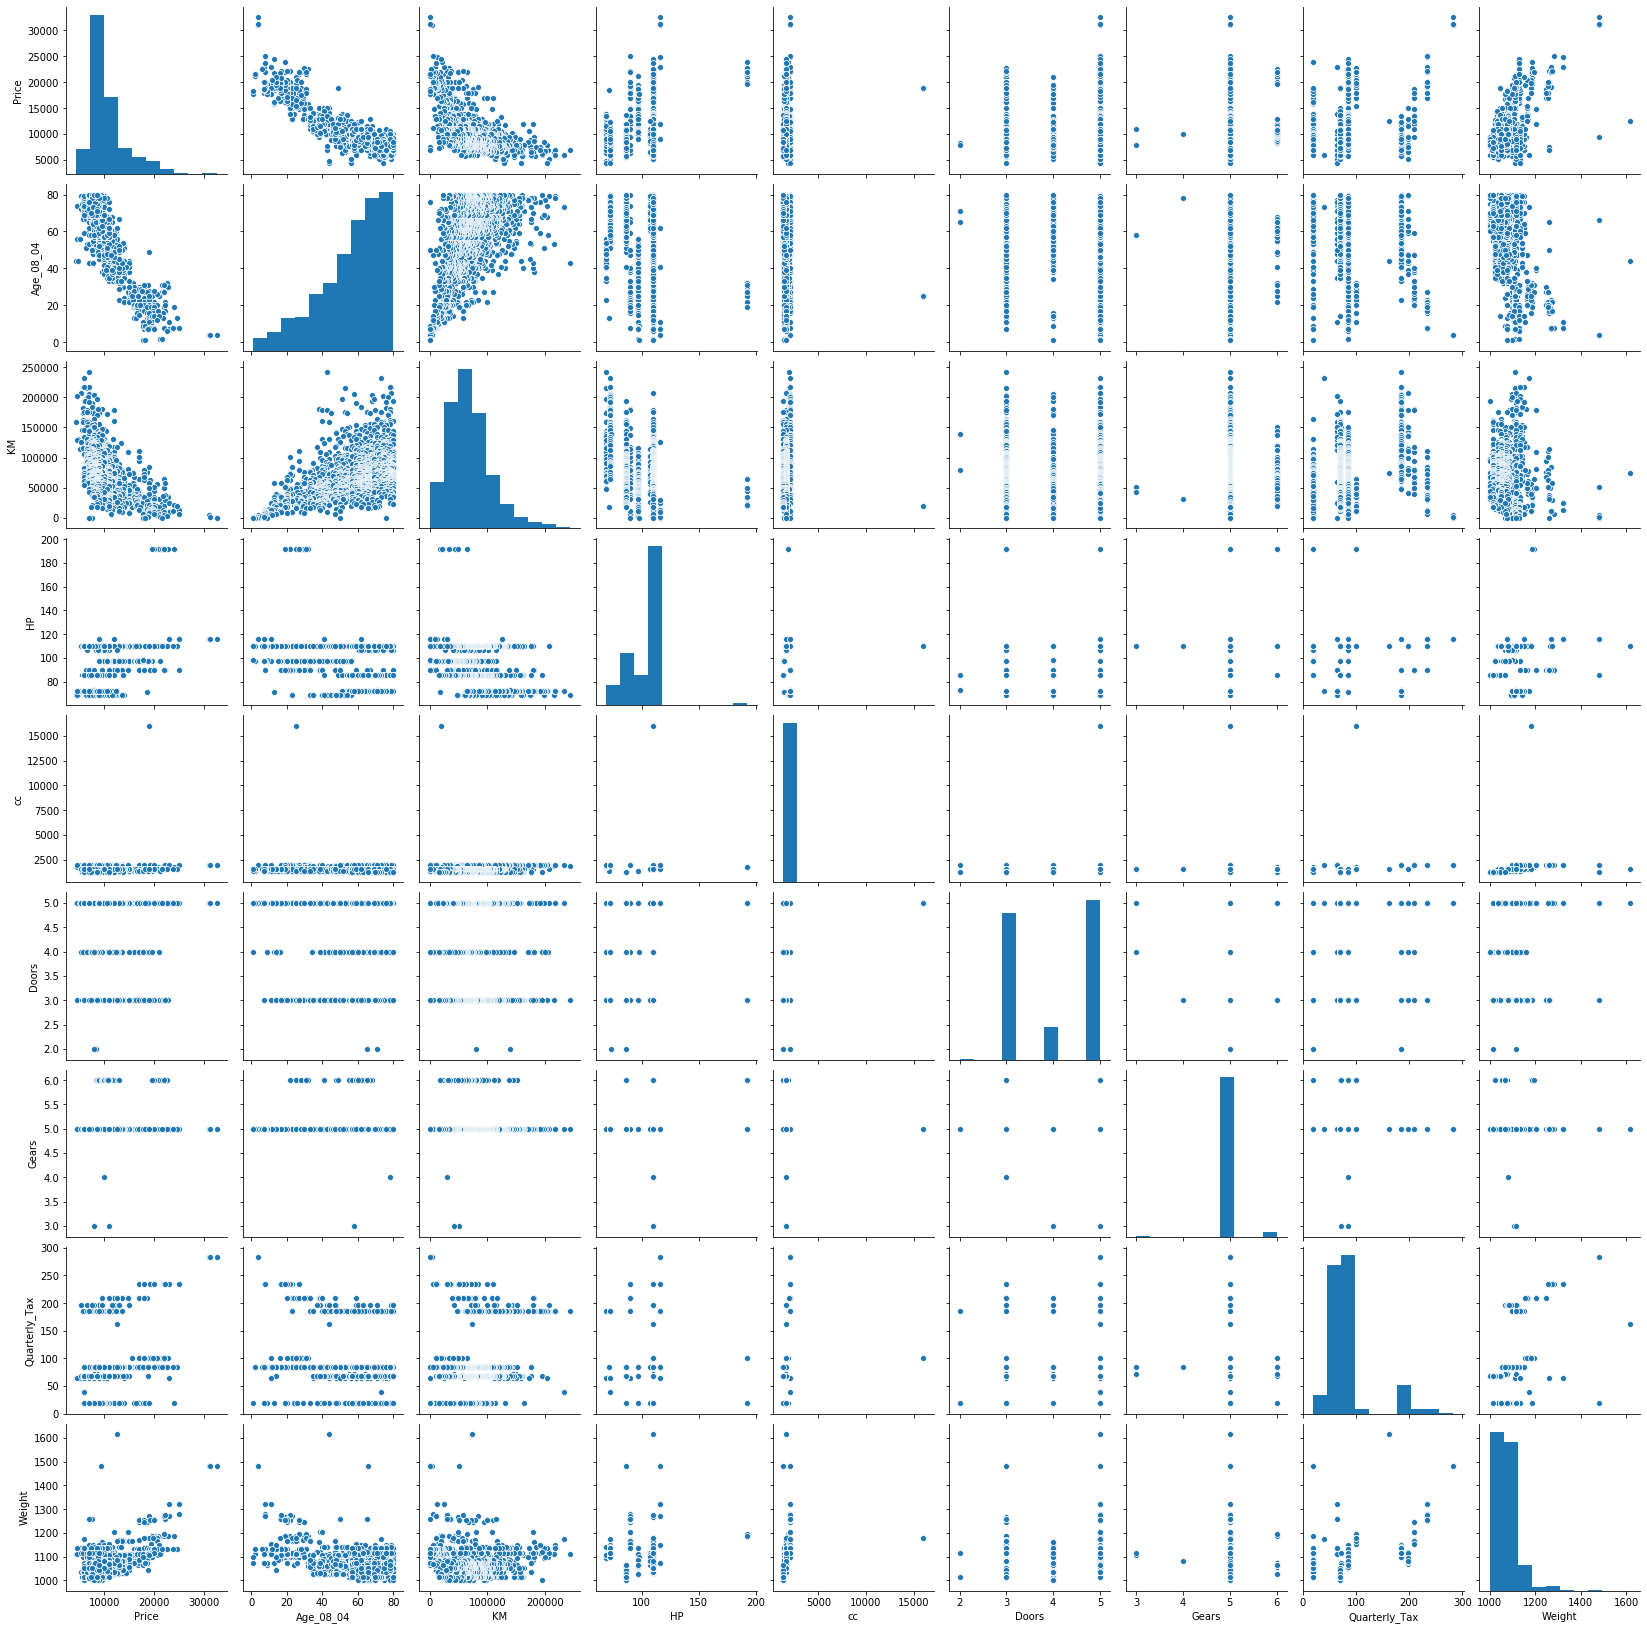

In [11]:
sns.pairplot(data=Corolla)

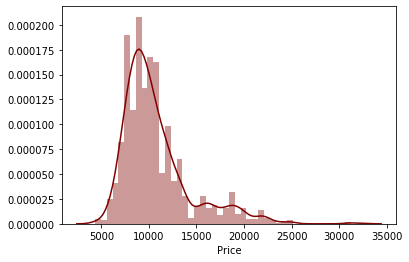

In [19]:
sns.distplot(Corolla['Price'],color='maroon')

In [22]:
Corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


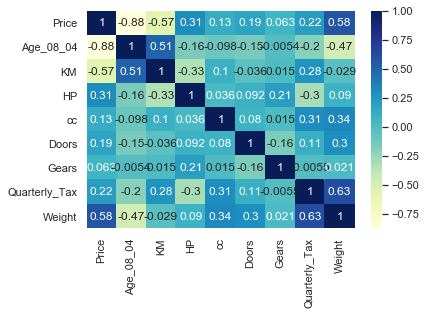

In [25]:
sns.heatmap(Corolla.corr(),cmap='YlGnBu',annot=True)

In [30]:
# Splitting the data into X and Y Variable

X = Corolla[['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
X.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [31]:
Y = Corolla['Price']
Y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [32]:
# Train and Test Split.

from sklearn.model_selection import train_test_split

In [33]:
X_train,Y_train,X_test,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [39]:
X_train = X[0:960]
X_train

X_test = X[960:1200]
X_test

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
960,66,50806,86,1300,3,5,19,1480
961,59,50469,110,1600,5,5,85,1070
962,61,50173,110,1600,5,5,85,1075
963,62,50000,110,1600,5,5,85,1075
964,65,49942,110,1600,3,6,85,1065
...,...,...,...,...,...,...,...,...
1195,74,89800,72,2000,3,5,185,1115
1196,79,89739,86,1300,5,5,69,1035
1197,76,89520,110,1600,3,5,69,1050
1198,75,89507,86,1300,3,5,69,1015


In [40]:
Y_train = Y[0:960]
Y_train

Y_test = X[960:1200]
Y_test

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
960,66,50806,86,1300,3,5,19,1480
961,59,50469,110,1600,5,5,85,1070
962,61,50173,110,1600,5,5,85,1075
963,62,50000,110,1600,5,5,85,1075
964,65,49942,110,1600,3,6,85,1065
...,...,...,...,...,...,...,...,...
1195,74,89800,72,2000,3,5,185,1115
1196,79,89739,86,1300,5,5,69,1035
1197,76,89520,110,1600,3,5,69,1050
1198,75,89507,86,1300,3,5,69,1015


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error

In [71]:
lm = LinearRegression()

In [72]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
lm.intercept_

-6962.027734664955

In [74]:
lm.coef_

array([-1.26678700e+02, -2.35496546e-02,  4.10683667e+01, -7.24854325e-02,
       -1.40171443e+01,  4.75737753e+02,  4.44926918e+00,  1.81412551e+01])

In [75]:
cdf = pd.DataFrame(data=lm.coef_,index=X_train.columns,columns=['Coefficients'])
cdf

,Coefficients
Age_08_04,-126.678700
KM,-0.023550
HP,41.068367
cc,-0.072485
Doors,-14.017144
Gears,475.737753
Quarterly_Tax,4.449269
Weight,18.141255


In [76]:
# Prediction

X_train_pred = lm.predict(X_train)
X_train_pred

array([16974.58623355, 16363.44914673, 16972.13196125, 16570.67078265,
       16378.38397527, 15595.15934577, 16797.59598643, 16858.48006859,
       21187.32329414, 14350.92078387, 21639.45096016, 21733.38230741,
       21622.30681161, 21078.63238559, 20689.82247974, 21559.013565  ,
       20470.52713208, 16648.73486232, 15538.83737289, 14884.4347385 ,
       14806.69732863, 16738.71869092, 15598.5436986 , 16166.77331471,
       16190.97725143, 16635.59161371, 16238.69906811, 15823.55554019,
       15886.01433244, 16411.0201159 , 15393.38680534, 15974.47431345,
       15475.05479667, 15526.79849607, 15837.86276705, 15284.04865634,
       15834.62113971, 16441.22335962, 14940.12240073, 15522.38960243,
       15648.07610054, 15132.21892484, 15697.48327592, 16685.86056309,
       17558.37725788, 18086.49927085, 17416.58279601, 15189.42238888,
       18218.5918249 , 20243.34904773, 18444.17396642, 14598.99168201,
       16987.29998154, 20630.30267516, 17002.86884457, 14497.62966136,
      

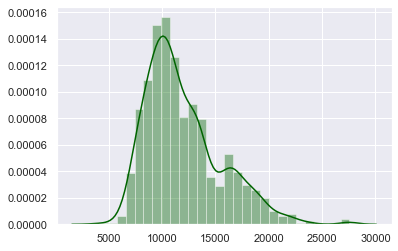

In [77]:
sns.distplot(X_train_pred,color='Darkgreen')

Text(0, 0.5, 'Predicted')

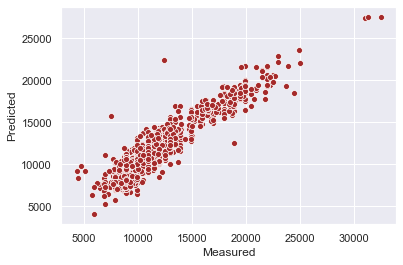

In [78]:
sns.scatterplot(x=Y_train,y=X_train_pred,color='brown')
plt.xlabel('Measured')
plt.ylabel('Predicted')

In [79]:
Train_error = np.square(X_train_pred - Y_train)
Train_error

0      1.207275e+07
1      6.830116e+06
2      9.133282e+06
3      2.626574e+06
4      6.908402e+06
           ...     
955    3.298968e+06
956    8.259487e+04
957    4.063702e+05
958    7.267842e+05
959    2.943911e+06
Name: Price, Length: 960, dtype: float64

In [80]:
Sum_error = np.sum(Train_error)
Sum_error

1826310437.4142992

In [89]:
# R-squared for the model fit [TRAIN]

print('R_squared_value : ',round(metrics.r2_score(Y_train,X_train_pred),2))

R_squared_value :  0.87


In [92]:
print('MSE :',Train_error.mean())

MSE : 1902406.7056398955


In [94]:
print('RMSE :',np.sqrt(Train_error.mean()))

RMSE : 1379.277602819641


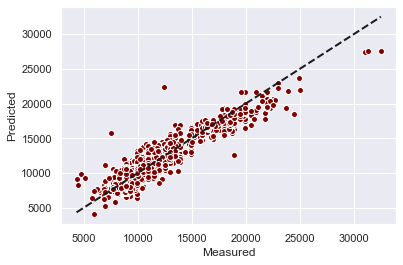

In [95]:
# Plot outputs

fig, ax = plt.subplots()
ax.scatter(Y_train, X_train_pred,color='maroon',edgecolors='white')
ax.plot([Y_train.min(),Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
def sum(a,b):
    